In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

print("All libraries imported successfully!")

All libraries imported successfully!


In [5]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Shape: (20640, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.81

In [6]:
print("CALIFORNIA HOUSING DATASET DESCRIPTION")
print(california.DESCR)

print("\nBASIC STATISTICS")
print(df.describe())


CALIFORNIA HOUSING DATASET DESCRIPTION
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the

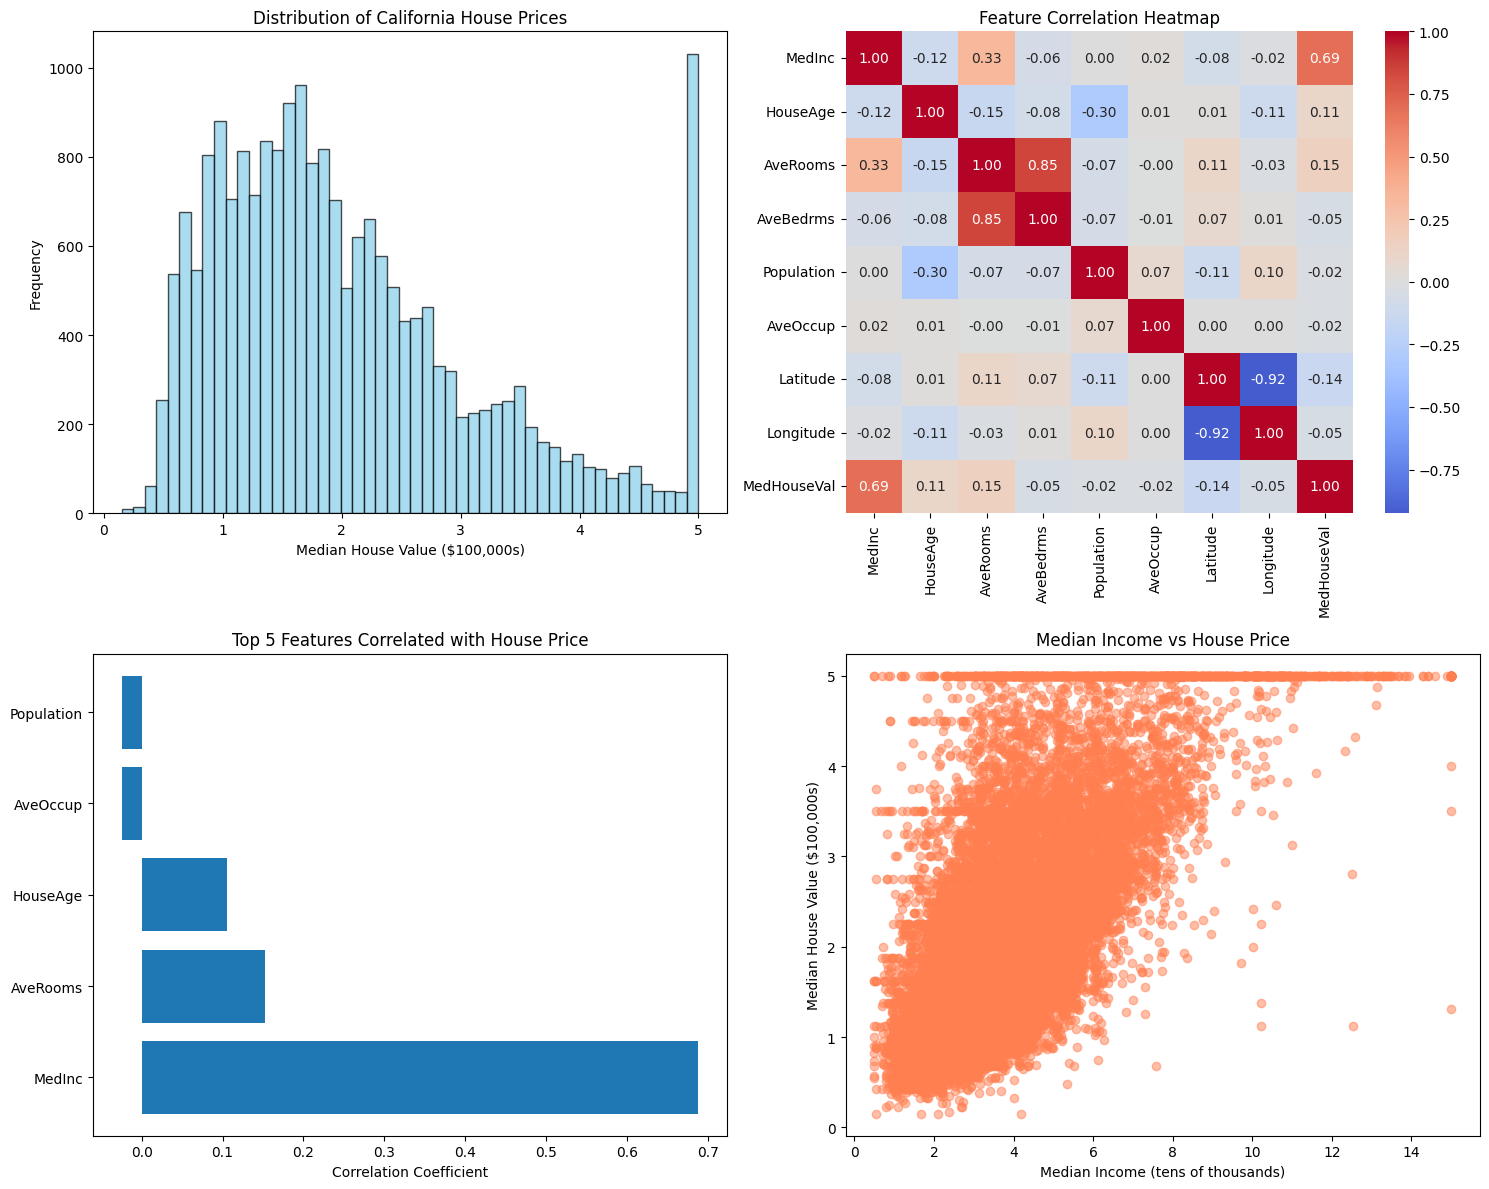

In [11]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of house prices
axes[0,0].hist(df['MedHouseVal'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of California House Prices')
axes[0,0].set_xlabel('Median House Value ($100,000s)')
axes[0,0].set_ylabel('Frequency')

# 2. Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,1], fmt='.2f')
axes[0,1].set_title('Feature Correlation Heatmap')

# 3. Most correlated features with price
price_corr = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
top_features = price_corr[1:6]  # Exclude MedHouseVal itself

axes[1,0].barh(range(len(top_features)), top_features.values)
axes[1,0].set_yticks(range(len(top_features)))
axes[1,0].set_yticklabels(top_features.index)
axes[1,0].set_title('Top 5 Features Correlated with House Price')
axes[1,0].set_xlabel('Correlation Coefficient')

# 4. Scatter plot: MedInc vs Price (most correlated)
axes[1,1].scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5, color='coral')
axes[1,1].set_xlabel('Median Income (tens of thousands)')
axes[1,1].set_ylabel('Median House Value ($100,000s)')
axes[1,1].set_title('Median Income vs House Price')

plt.tight_layout()
plt.show()

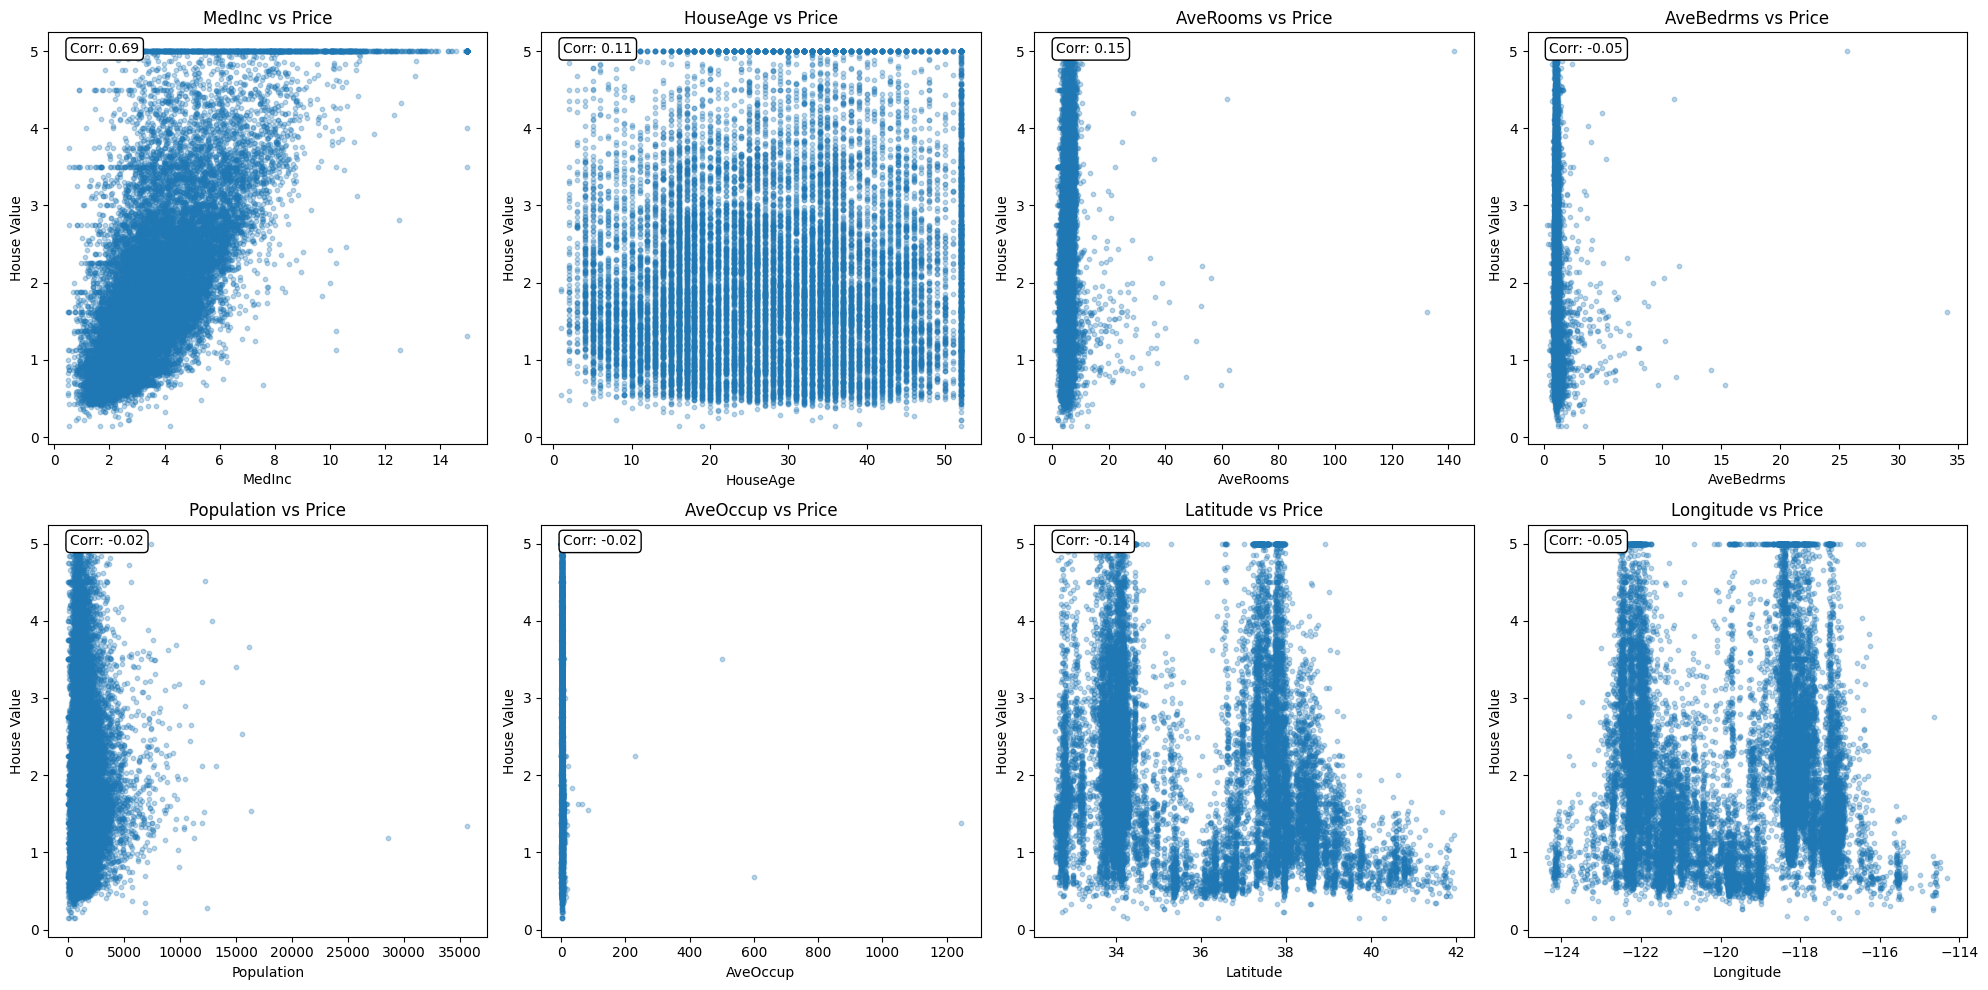

In [12]:
# Detailed feature analysis
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Key features vs Price scatter plots
features_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 
                   'Population', 'AveOccup', 'Latitude', 'Longitude']

for i, feature in enumerate(features_to_plot):
    row, col = i // 4, i % 4
    axes[row, col].scatter(df[feature], df['MedHouseVal'], alpha=0.3, s=10)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('House Value')
    axes[row, col].set_title(f'{feature} vs Price')
    
    # Add correlation coefficient
    corr = df[feature].corr(df['MedHouseVal'])
    axes[row, col].text(0.05, 0.95, f'Corr: {corr:.2f}', 
                       transform=axes[row, col].transAxes, 
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

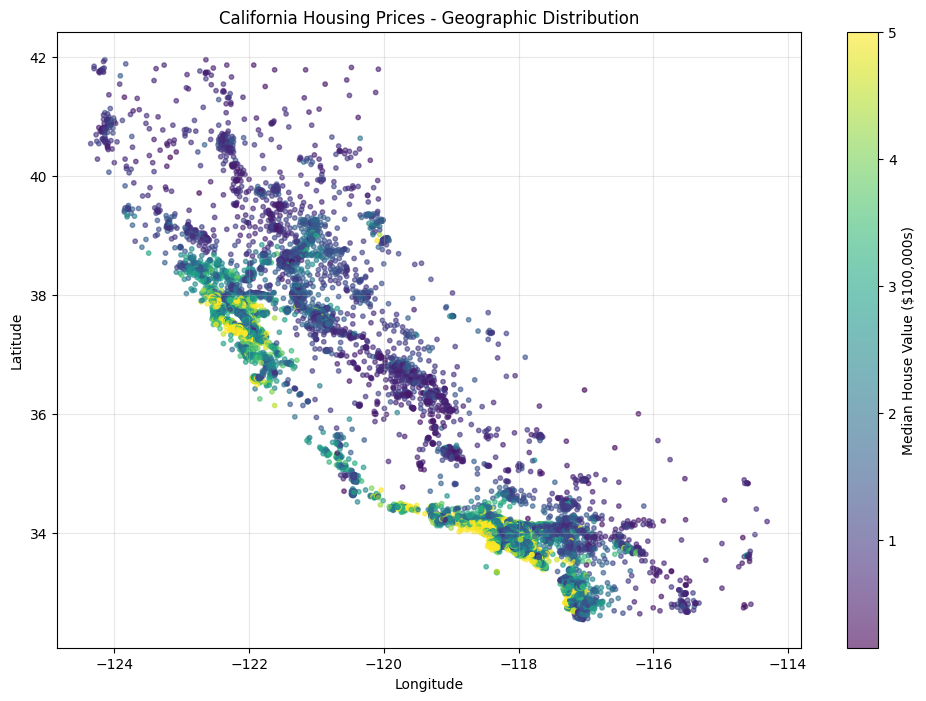

In [13]:
# California housing map
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                     c=df['MedHouseVal'], cmap='viridis', 
                     alpha=0.6, s=10)
plt.colorbar(scatter, label='Median House Value ($100,000s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices - Geographic Distribution')
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Check for infinite values
print("\nInfinite values in each column:")
print(np.isinf(df).sum())

# Prepare features and target variable
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures after scaling (first 5 rows):")
print(X_scaled.head())

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Infinite values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Features shape: (20640, 8)
Target shape: (20640,)

Features after scaling (first 5 rows):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nModel trained successfully!")

Training set size: 16512 samples
Testing set size: 4128 samples

Model trained successfully!


In [16]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("=== MODEL PERFORMANCE ===")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE:  {test_mse:.4f}")
print(f"Training R²:  {train_r2:.4f}")
print(f"Testing R²:   {test_r2:.4f}")
print(f"Training MAE: ${train_mae*100000:.2f}")
print(f"Testing MAE:  ${test_mae*100000:.2f}")

=== MODEL PERFORMANCE ===
Training MSE: 0.5179
Testing MSE:  0.5559
Training R²:  0.6126
Testing R²:   0.5758
Training MAE: $52862.84
Testing MAE:  $53320.01


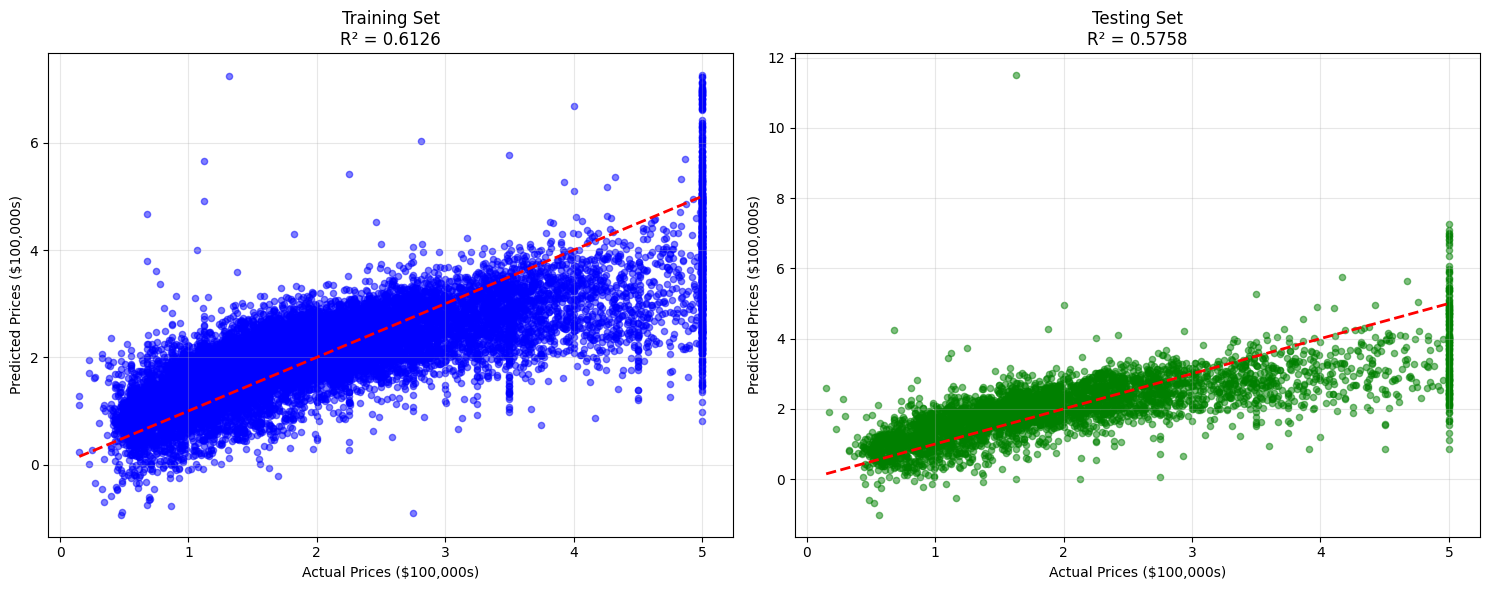

In [17]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set predictions
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue', s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Prices ($100,000s)')
axes[0].set_ylabel('Predicted Prices ($100,000s)')
axes[0].set_title(f'Training Set\nR² = {train_r2:.4f}')
axes[0].grid(True, alpha=0.3)

# Testing set predictions
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='green', s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Prices ($100,000s)')
axes[1].set_ylabel('Predicted Prices ($100,000s)')
axes[1].set_title(f'Testing Set\nR² = {test_r2:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== FEATURE IMPORTANCE ===
      Feature  Coefficient  Abs_Coefficient
6    Latitude    -0.896635         0.896635
7   Longitude    -0.868927         0.868927
0      MedInc     0.852382         0.852382
3   AveBedrms     0.371132         0.371132
2    AveRooms    -0.305116         0.305116
1    HouseAge     0.122382         0.122382
5    AveOccup    -0.036624         0.036624
4  Population    -0.002298         0.002298


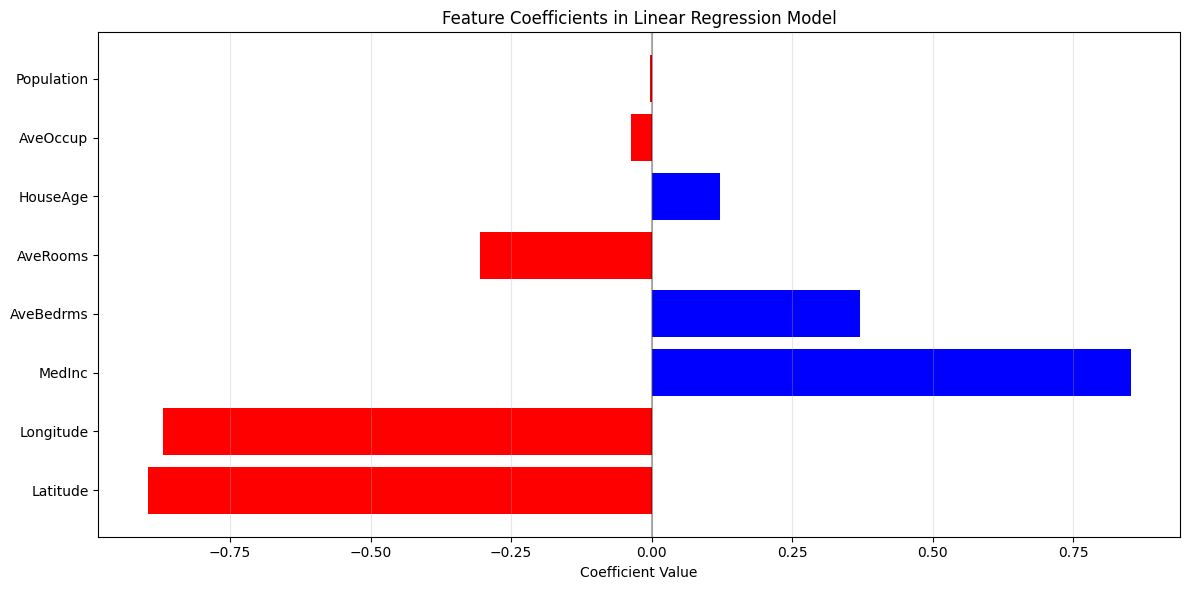

In [18]:
# Get feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("=== FEATURE IMPORTANCE ===")
print(feature_importance)

# Plot feature coefficients
plt.figure(figsize=(12, 6))
colors = ['red' if x < 0 else 'blue' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients in Linear Regression Model')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

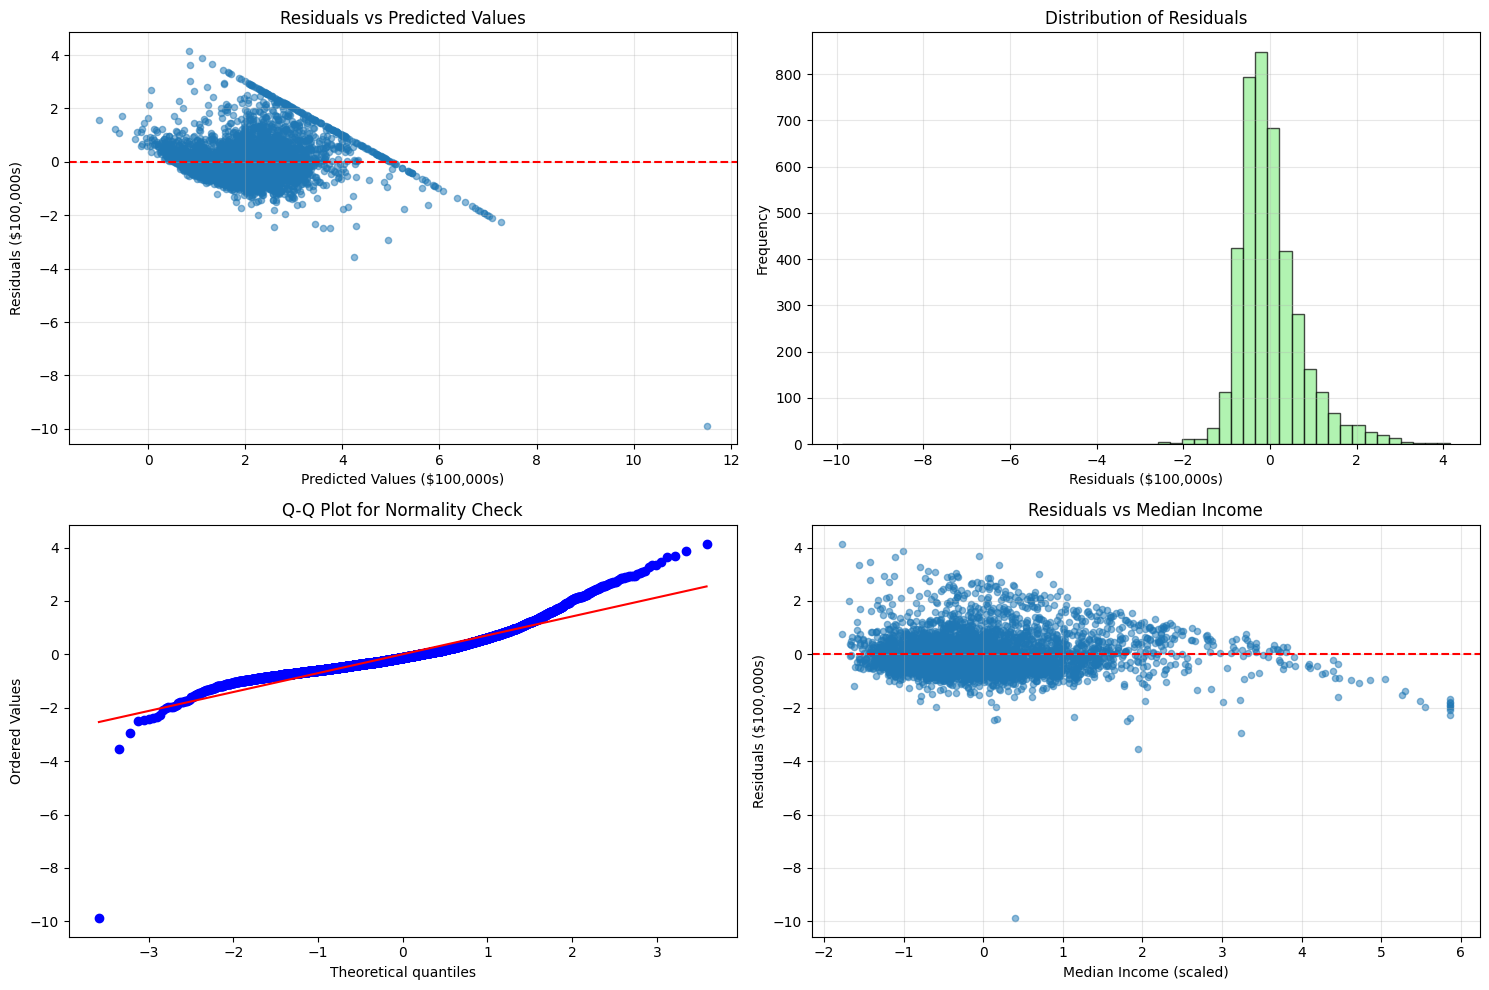

In [19]:
# Residual analysis
residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Residuals vs Predicted values
axes[0,0].scatter(y_test_pred, residuals, alpha=0.5, s=20)
axes[0,0].axhline(y=0, color='red', linestyle='--')
axes[0,0].set_xlabel('Predicted Values ($100,000s)')
axes[0,0].set_ylabel('Residuals ($100,000s)')
axes[0,0].set_title('Residuals vs Predicted Values')
axes[0,0].grid(True, alpha=0.3)

# 2. Distribution of residuals
axes[0,1].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axes[0,1].set_xlabel('Residuals ($100,000s)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Residuals')
axes[0,1].grid(True, alpha=0.3)

# 3. Q-Q plot for normality
stats.probplot(residuals, dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot for Normality Check')

# 4. Residuals vs MedInc (most important feature)
axes[1,1].scatter(X_test['MedInc'], residuals, alpha=0.5, s=20)
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_xlabel('Median Income (scaled)')
axes[1,1].set_ylabel('Residuals ($100,000s)')
axes[1,1].set_title('Residuals vs Median Income')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
print("=== MODEL INTERPRETATION ===")
print("The linear regression model suggests that:")
print(f"• Median Income (MedInc) is the strongest predictor with coefficient: {model.coef_[0]:.4f}")
print("• This means for each standard deviation increase in median income,")
print(f"  house prices increase by ${model.coef_[0]*100000:,.2f} on average")

# Intercept interpretation
print(f"\n• Base price (intercept): ${model.intercept_*100000:,.2f}")
print("  This is the predicted price when all features are at their mean values")

=== MODEL INTERPRETATION ===
The linear regression model suggests that:
• Median Income (MedInc) is the strongest predictor with coefficient: 0.8524
• This means for each standard deviation increase in median income,
  house prices increase by $85,238.17 on average

• Base price (intercept): $206,786.23
  This is the predicted price when all features are at their mean values
